In [283]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [284]:
data = pd.read_csv('student_clustering.csv')
print(data.shape)
print(data.head())

x = data[['cgpa']]
y = data['iq']

(200, 2)
   cgpa   iq
0  5.13   88
1  5.90  113
2  8.36   93
3  8.27   97
4  5.45  110


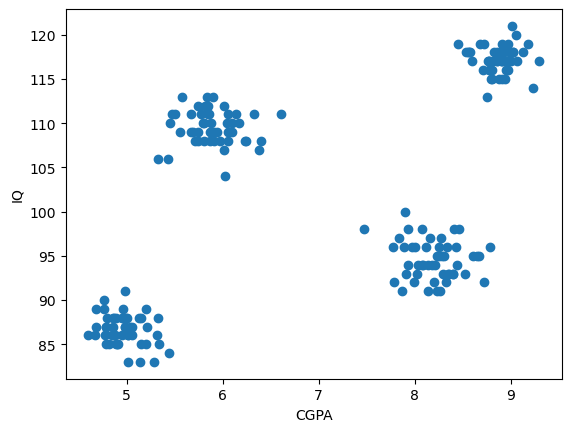

In [285]:

plt.scatter(x , y)
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()


In [ ]:
wcss = []

for i in range(1, 15):
  km = KMeans(n_clusters=i)
  km.fit(x, y)
  wcss.append(km.inertia_)
print(wcss)

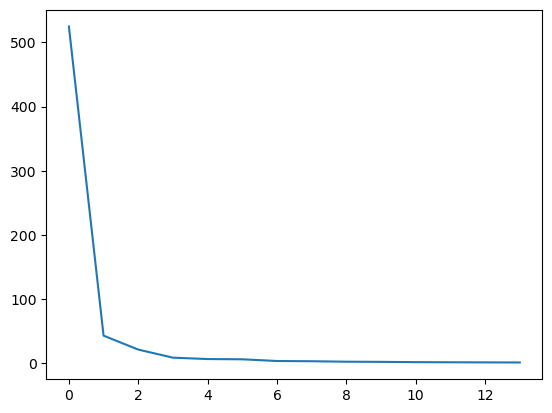

In [287]:
plt.plot(wcss)
plt.show()

In [288]:
km = KMeans(n_clusters=4, random_state=42)
y_pred = km.fit_predict(x)
print(y_pred)

[3 0 1 1 0 0 1 2 0 1 3 0 1 3 0 1 0 1 0 0 1 3 1 3 3 1 3 2 1 3 2 0 2 3 1 1 2
 0 3 0 3 1 1 3 2 2 1 0 1 0 3 3 2 1 2 0 0 2 0 2 0 1 2 2 3 2 2 3 0 1 0 2 1 3
 0 2 0 2 3 2 1 2 0 3 2 3 2 0 2 0 2 2 1 3 2 1 2 2 3 2 0 3 3 2 3 3 1 3 2 2 1
 2 0 0 1 2 1 0 2 3 3 0 1 2 1 3 1 0 3 1 1 0 3 3 0 2 0 3 1 1 1 3 0 3 3 2 3 2
 0 3 2 3 2 2 3 1 0 2 0 1 3 2 0 1 2 3 0 3 3 2 2 0 2 3 3 1 2 0 3 2 2 0 0 0 1
 3 1 1 2 0 1 1 3 3 2 3 2 0 0 2]


c:\Users\Abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



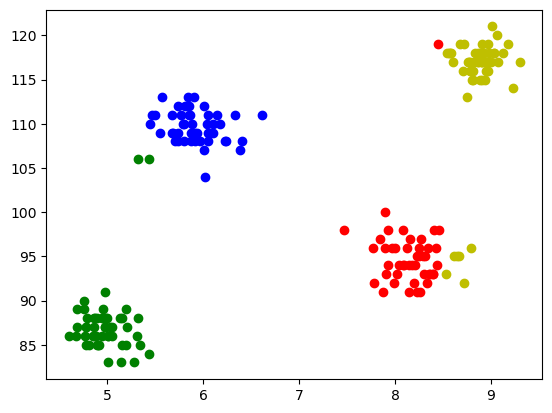

In [289]:
plt.scatter(x[ y_pred == 0], y[ y_pred == 0], color = 'b')
plt.scatter(x[ y_pred == 1], y[ y_pred == 1], color = 'r')
plt.scatter(x[ y_pred == 2], y[ y_pred == 2], color = 'y')
plt.scatter(x[ y_pred == 3], y[ y_pred == 3], color = 'g')

# K-Means on 3D data

In [290]:
from sklearn.datasets import make_blobs

centroids = [(-5, -5, 5), (5,5,-5), (3.5,-2.5,4), (-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X, y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centroids, n_features=3, random_state=1)

print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [291]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0],y = X[:, 1], z = X[:, 2])
fig.show()


In [ ]:
wcss = []

for i in range(1, 10):
  km = KMeans(n_clusters=i)
  km.fit(X, y)
  wcss.append(km.inertia_)

In [293]:
print(wcss)

[11143.784324503362, 4122.409557603533, 2163.2694504362976, 2115.8258035754607, 560.5113064480843, 504.88431705188077, 452.8166753778394, 437.2710399306105, 413.5218986098974]


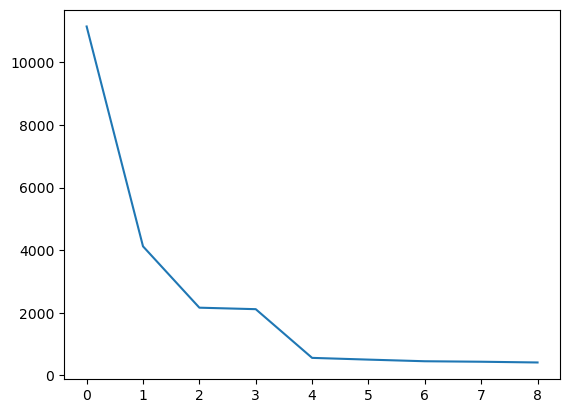

In [294]:
plt.plot(wcss)
plt.show()

In [295]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

c:\Users\Abc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [296]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [297]:
fig = px.scatter_3d(df, x='col1', y='col2', z='col3', color='label')
fig.show()